In [2]:
import pymysql
import pandas as pd

# 파이썬 파일에서 Mysql 과 연결
conn=pymysql.connect(host='localhost', user='root', password='1234', db='population', charset='utf8')

cur = conn.cursor() # cursor생성 : SQL문 실행, 결과 집합 처리, 트랜잭션 관리, 오류 처리를 수행함
cur.execute('''select a.subject, 2013a, 2014a,2015a,2016a,2017a,2018a,2019a,2020a,2021a,2022a  from 
           (select subject, sum(number) as 2013a from participants where local="서  울 (%)" and year=2013 group by subject) as a
inner join (select subject, sum(number) as 2014a from participants where local="서  울 (%)" and year=2014 group by subject) as b
on a.subject=b.subject
inner join (select subject, sum(number) as 2015a from participants where local="서  울 (%)" and year=2015 group by subject) as c
on a.subject=c.subject
inner join (select subject, sum(number) as 2016a from participants where local="서  울 (%)" and year=2016 group by subject) as d
on a.subject=d.subject
inner join (select subject, sum(number) as 2017a from participants where local="서  울 (%)" and year=2017 group by subject) as e
on a.subject=e.subject
inner join (select subject, sum(number) as 2018a from participants where local="서  울 (%)" and year=2018 group by subject) as f
on a.subject=f.subject
inner join (select subject, sum(number) as 2019a from participants where local="서  울 (%)" and year=2019 group by subject) as g
on a.subject=g.subject
inner join (select subject, sum(number) as 2020a from participants where local="서  울 (%)" and year=2020 group by subject) as h
on a.subject=h.subject
inner join (select subject, sum(number) as 2021a from participants where local="서  울 (%)" and year=2021 group by subject) as i
on a.subject=i.subject
inner join (select subject, sum(number) as 2022a from participants where local="서  울 (%)" and year=2022 group by subject) as j
on a.subject=j.subject;''') # SQL문 실행
rows=cur.fetchall() # 결과 집합 처리
DF=pd.DataFrame(rows) # DataFrame으로 변환

cur.execute('''-- inner join을 사용하여 subject, local, 2013a,2014a,2015a,...,2022a까지 열을 출력하는 서울, 광역시, 중소도시 별 사교육 참여 비율을 출력
select a.subject, a.local, 2013a, 2014a, 2015a, 2016a, 2017a, 2018a, 2019a, 2020a, 2021a, 2022a from (select subject, local, sum(number) as 2013a from participants where local in ("서  울 (%)","광역시 (%)","중소도시 (%)") and year=2013 group by subject,local) as a
inner join (select subject, local, sum(number) as 2014a from participants where local in ("서  울 (%)","광역시 (%)","중소도시 (%)") and year=2014 group by subject,local) as b on a.subject=b.subject and a.local=b.local
inner join (select subject, local, sum(number) as 2015a from participants where local in ("서  울 (%)","광역시 (%)","중소도시 (%)") and year=2015 group by subject,local) as c on a.subject=c.subject and a.local=c.local
inner join (select subject, local, sum(number) as 2016a from participants where local in ("서  울 (%)","광역시 (%)","중소도시 (%)") and year=2016 group by subject,local) as d on a.subject=d.subject and a.local=d.local
inner join (select subject, local, sum(number) as 2017a from participants where local in ("서  울 (%)","광역시 (%)","중소도시 (%)") and year=2017 group by subject,local) as e on a.subject=e.subject and a.local=e.local
inner join (select subject, local, sum(number) as 2018a from participants where local in ("서  울 (%)","광역시 (%)","중소도시 (%)") and year=2018 group by subject,local) as f on a.subject=f.subject and a.local=f.local
inner join (select subject, local, sum(number) as 2019a from participants where local in ("서  울 (%)","광역시 (%)","중소도시 (%)") and year=2019 group by subject,local) as g on a.subject=g.subject and a.local=g.local
inner join (select subject, local, sum(number) as 2020a from participants where local in ("서  울 (%)","광역시 (%)","중소도시 (%)") and year=2020 group by subject,local) as h on a.subject=h.subject and a.local=h.local
inner join (select subject, local, sum(number) as 2021a from participants where local in ("서  울 (%)","광역시 (%)","중소도시 (%)") and year=2021 group by subject,local) as i on a.subject=i.subject and a.local=i.local
inner join (select subject, local, sum(number) as 2022a from participants where local in ("서  울 (%)","광역시 (%)","중소도시 (%)") and year=2022 group by subject,local) as j on a.subject=j.subject and a.local=j.local;''') # SQL문 실행
rows=cur.fetchall() # 결과 집합 처리
DF3=pd.DataFrame(rows) # DataFrame으로 변환


cur.close()
conn.close()


In [3]:
DF.rename(columns={0:'분류',1:'2013',2:'2014',3:'2015',4:'2016',5:'2017',6:'2018',7:'2019',8:'2020',9:'2021',10:'2022'},inplace=True)

In [4]:
DF

,분류,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,대상분포(%),17,16,16,16,16,16,15,15,15,15
1,사교육 참여,75,74,74,73,77,79,80,75,81,84
2,과목: 일반교과 사교육,63,62,59,55,58,59,63,60,68,70
3,국 어,19,19,19,19,21,22,23,23,27,27
4,영 어,50,48,47,45,46,48,51,49,57,60
5,수 학,49,49,46,46,48,49,51,51,57,58
6,"사회, 과학",10,10,10,11,12,12,13,13,16,16
7,논 술,10,9,9,9,10,10,11,11,14,14
8,"제2외국어, 한문, 컴퓨터 등",5,4,5,5,6,6,8,5,7,8
9,"과목: 예체능,취미,교양 사교육",36,37,38,42,45,48,48,36,45,50


In [5]:
DF.set_index("분류", inplace=True)

In [6]:
DF.sort_values(by="2013", inplace=True, ascending=False)

In [7]:
DF.drop(["대상분포(%)","사교육 참여"],axis=0)
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 사교육 참여 to 방문수업 및 기타
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2013    23 non-null     object
 1   2014    23 non-null     object
 2   2015    23 non-null     object
 3   2016    23 non-null     object
 4   2017    23 non-null     object
 5   2018    23 non-null     object
 6   2019    23 non-null     object
 7   2020    23 non-null     object
 8   2021    23 non-null     object
 9   2022    23 non-null     object
dtypes: object(10)
memory usage: 2.5+ KB


In [8]:
for i in DF.columns:
    DF[i]=DF[i].astype(int)

In [9]:
DF2=DF.loc[["학원수강","개인과외","그룹과외","방문학습지","유료인터넷 및 통신강좌 등","방문수업 및 기타"]]

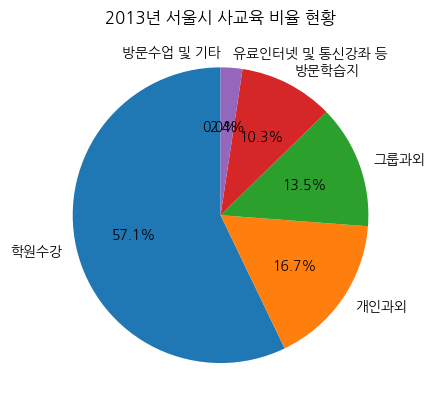

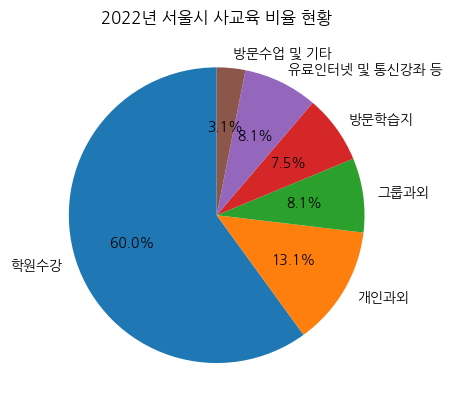

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from matplotlib.ticker import FuncFormatter

plt.pie(DF2["2013"], labels=DF2.index, autopct='%1.1f%%', startangle=90)
plt.title("2013년 서울시 사교육 비율 현황")
plt.show()
plt.pie(DF2["2022"], labels=DF2.index, autopct='%1.1f%%', startangle=90)
plt.title("2022년 서울시 사교육 비율 현황")
plt.show()


In [11]:
DF3.set_index(0)

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
대상분포(%),서 울 (%),17,16,16,16,16,16,15,15,15,15
대상분포(%),광역시 (%),25,25,24,24,24,23,23,23,23,23
대상분포(%),중소도시 (%),42,42,45,46,43,44,44,44,44,44
사교육 참여,서 울 (%),75,74,74,73,77,79,80,75,81,84
사교육 참여,광역시 (%),68,67,68,67,71,72,75,66,76,78
...,...,...,...,...,...,...,...,...,...,...,...
"유형: 예체능,취미,교양 사교육",광역시 (%),30,30,33,36,40,41,43,31,40,44
"유형: 예체능,취미,교양 사교육",중소도시 (%),33,33,35,38,41,43,45,32,41,45
방문수업 및 기타,서 울 (%),0,0,1,8,7,7,7,2,3,5


In [12]:
seoul_DF=DF3.loc[[i for i in range(0,69,3)]]
city_DF=DF3.loc[[i for i in range(1,69,3)]]
small_city_DF=DF3.loc[[i for i in range(2,69,3)]]

In [13]:
seoul_DF.set_index(0,inplace=True)
city_DF.set_index(0,inplace=True)
small_city_DF.set_index(0,inplace=True)

In [14]:
seoul_DF=seoul_DF.loc[["학원수강","개인과외","그룹과외","방문학습지","유료인터넷 및 통신강좌 등","방문수업 및 기타"]]
city_DF=city_DF.loc[["학원수강","개인과외","그룹과외","방문학습지","유료인터넷 및 통신강좌 등","방문수업 및 기타"]]
small_city_DF=small_city_DF.loc[["학원수강","개인과외","그룹과외","방문학습지","유료인터넷 및 통신강좌 등","방문수업 및 기타"]]

In [15]:
city_DF

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
학원수강,광역시 (%),65,63,63,64,68,69,75,64,80,86
개인과외,광역시 (%),14,14,15,15,14,14,12,12,13,13
그룹과외,광역시 (%),13,12,13,11,13,12,12,10,11,10
방문학습지,광역시 (%),11,11,10,11,11,12,11,10,11,10
유료인터넷 및 통신강좌 등,광역시 (%),2,2,2,5,5,6,7,6,10,10
방문수업 및 기타,광역시 (%),0,0,0,4,6,5,5,2,3,4


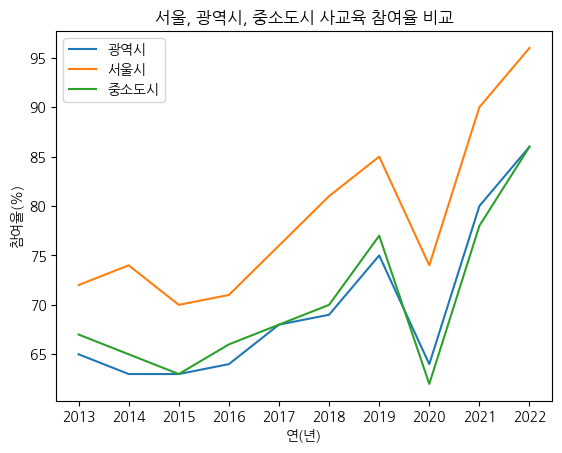

In [31]:
#2023년 기준으로 서울수와 광역시 수를 비교
plt.plot(city_DF.loc["학원수강"][1:11], label="광역시")
plt.plot(seoul_DF.loc["학원수강"][1:11], label="서울시")
plt.plot(small_city_DF.loc["학원수강"][1:11], label="중소도시")
plt.legend()
plt.title("서울, 광역시, 중소도시 사교육 참여율 비교")
plt.ylabel("참여율(%)")
plt.xlabel("연(년)")
plt.xticks(range(2,12), [i for i in range(2013,2023)])
plt.show()

In [17]:
ratio=pd.read_csv("서울 비율.csv")
ratio=ratio.iloc[21:31] # 2013~2022비율만 뽑아옴
for col in seoul_DF.columns[1:]:
    seoul_DF[col]=seoul_DF[col].astype("float64")

In [18]:
seoul_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 학원수강 to 방문수업 및 기타
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       6 non-null      object 
 1   2       6 non-null      float64
 2   3       6 non-null      float64
 3   4       6 non-null      float64
 4   5       6 non-null      float64
 5   6       6 non-null      float64
 6   7       6 non-null      float64
 7   8       6 non-null      float64
 8   9       6 non-null      float64
 9   10      6 non-null      float64
 10  11      6 non-null      float64
dtypes: float64(10), object(1)
memory usage: 748.0+ bytes


In [19]:
seoul_DF.loc["학원수강"][1:11].reset_index(drop=True)

0    72.0
1    74.0
2    70.0
3    71.0
4    76.0
5    81.0
6    85.0
7    74.0
8    90.0
9    96.0
Name: 학원수강, dtype: object

In [20]:
ratio["0"].reset_index(drop=True)

0    0.776030
1    0.771867
2    0.765524
3    0.759103
4    0.756776
5    0.753360
6    0.754882
7    0.755167
8    0.748799
9    0.746116
Name: 0, dtype: float64

In [21]:
seoul_result=seoul_DF.loc["학원수강"][1:11].reset_index(drop=True)/ratio["0"].reset_index(drop=True)
city_result = city_DF.loc["학원수강"][1:11].reset_index(drop=True)
small_city_result = small_city_DF.loc["학원수강"][1:11].reset_index(drop=True)

In [22]:
small_city_DF.info()
for col in small_city_DF.columns[1:]:
    small_city_DF[col]=small_city_DF[col].astype("float64")
city_result=city_result.astype("int64")
seoul_result=seoul_result.astype("int64")
small_city_result=small_city_result.astype("int64")

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 학원수강 to 방문수업 및 기타
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       6 non-null      object
 1   2       6 non-null      object
 2   3       6 non-null      object
 3   4       6 non-null      object
 4   5       6 non-null      object
 5   6       6 non-null      object
 6   7       6 non-null      object
 7   8       6 non-null      object
 8   9       6 non-null      object
 9   10      6 non-null      object
 10  11      6 non-null      object
dtypes: object(11)
memory usage: 748.0+ bytes


In [23]:
div_var=pd.Series([1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3])
div_var

0    1.3
1    1.3
2    1.3
3    1.3
4    1.3
5    1.3
6    1.3
7    1.3
8    1.3
9    1.3
dtype: float64

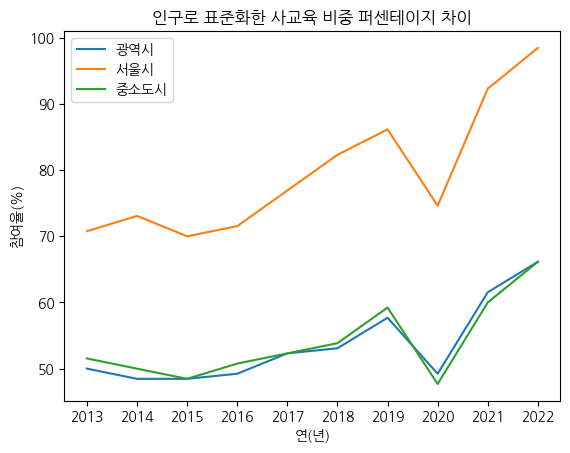

In [32]:
#2023년 기준으로 서울수와 광역시 수를 비교
plt.plot(city_result/div_var, label="광역시")
plt.plot(seoul_result/div_var, label="서울시")
plt.plot(small_city_result/div_var, label="중소도시")
plt.legend()
plt.title("인구로 표준화한 사교육 비중 퍼센테이지 차이")
plt.ylabel("참여율(%)")
plt.xlabel("연(년)")
plt.xticks(range(10), [i for i in range(2013,2023)])
plt.show()

In [25]:
final=(city_result/div_var+small_city_result/div_var)/2
final=final.astype("int64")
final2=seoul_result/div_var-final

In [26]:
final2

0    20.769231
1    24.076923
2    22.000000
3    21.538462
4    24.923077
5    29.307692
6    28.153846
7    26.615385
8    32.307692
9    32.461538
dtype: float64

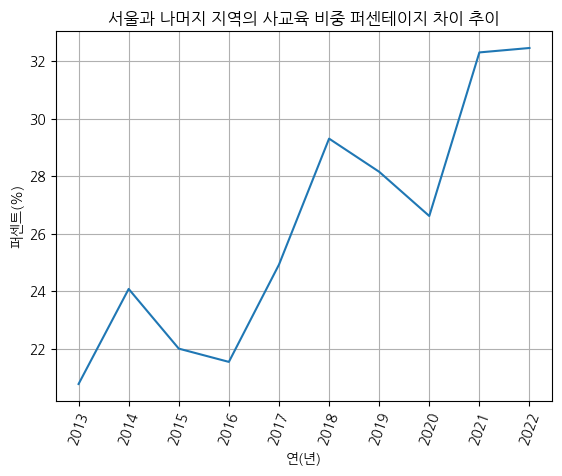

In [33]:
plt.plot(final2)
plt.xticks(range(10), [i for i in range(2013,2023)],rotation=70)
plt.title("서울과 나머지 지역의 사교육 비중 퍼센테이지 차이 추이")
plt.ylabel("퍼센트(%)")
plt.xlabel("연(년)")
plt.grid(True)

In [28]:
test=pd.read_csv("Data/수능 응시자수.csv")
test

,학년도,시험일정,지원인원(명),응시인원(명),응시율(퍼센트)
0,1994,1993-08-20,742668,716326,96.5
1,1994,1993-11-16,750181,726634,96.9
2,1995,1994-11-23,781749,757488,96.9
3,1996,1995-11-22,840661,809867,96.3
4,1997,1996-11-13,824374,795338,96.5
5,1998,1997-11-19,885321,854272,96.5
6,1999,1998-11-18,868643,839837,96.7
7,2000,1999-11-17,896122,868366,96.9
8,2001,2000-11-15,872297,850305,97.5
9,2002,2001-11-07,739129,718441,97.2


Text(0, 0.5, '응시인원(명)')

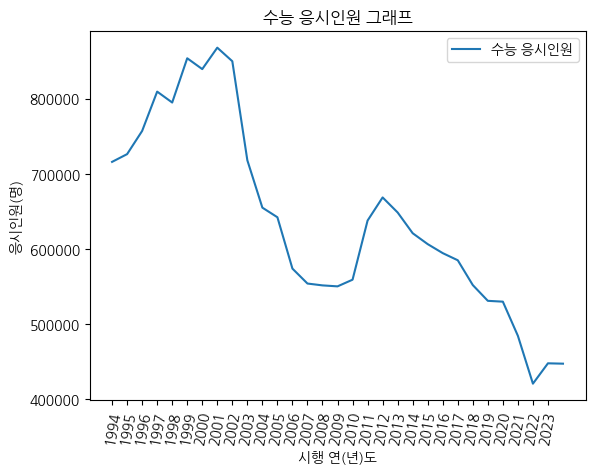

In [36]:
plt.plot(range(31), test.loc[:,"응시인원(명) "].values,label="수능 응시인원")
plt.title("수능 응시인원 그래프")
plt.legend()
plt.xticks(range(30), [i for i in range(1994,2024)], rotation=80)
plt.xlabel("시행 연(년)도")
plt.ylabel("응시인원(명)")

In [30]:
# 사교육 추세는 그래프를 보아, 전체적으로 상승하고 있다
# 고착화된 한국의 교육은 2021년과 2022년에 들어 완만한 변화를 보이고 있다
# 학령인구 감소로 인한 사교육 시장 감소 시작 : https://blog.naver.com/globalanalytica/223094502824
# 지역간의 이동과 사교육의 관계성은 크기 발견하지 못함
# 사교육 현황 : https://blog.naver.com/katsu17/223087127309
# 상대적으로 학령인구가 감소함에도 사교육의 크기는 커지고 있음을 확인할 수 있음